<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 3*

# 📝 Assignment

# 신뢰구간

서울시 기간별 시간평균 대기환경 정보 데이터셋을 이용합니다.

<img src='https://user-images.githubusercontent.com/6457691/89852263-740add80-dbc9-11ea-9e6b-8059b3f7e479.png'>

<https://data.seoul.go.kr/dataList/OA-2221/S/1/datasetView.do>

### `2020년 3월`의 송파구 데이터만 사용합니다.



## 1. 데이터셋을 불러오세요

  - 데이터는 `df`라는 변수에 저장되어야 하며
  - Feature로는 `측정일시`, `측정소명`, `오존(ppm)` 만 사용합니다.

In [80]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/서울시_기간별_시간평균_대기환경_정보_2020.03.csv',encoding='cp949')
df = df[df['측정소명']=='송파구'].loc[:,['측정일시','측정소명','오존(ppm)']]

(744, 3)

## 2. 데이터셋으로 부터 2개의 샘플을 생성하세요.

- `s1`에 저장된 1개는 20개의 데이터, `s2`에 저장된 다른 1개는 200개이며 
- 두 경우 모두 `random_state`로 `42`를 설정합니다.

In [82]:
import numpy as np

# np.random.seed(42)

s1, s2 = df.sample(n=20,random_state=42),df.sample(n=200,random_state=42)

0.044000000000000004

## 3. 두 샘플데이터에 대해서 `오존(ppm)`항목의 표본 평균을 계산하세요.

In [70]:
s1_ozone = s1['오존(ppm)']
s2_ozone = s2['오존(ppm)']

s1_ozone_mean = np.mean(np.array(s1_ozone))
s2_ozone_mean = np.mean(np.array(s2_ozone))


202003281400

## 4. 위에서 추정한 값들을 바탕으로, 95%에 해당하는 신뢰구간을 `CI1과` `CI2`에 계산하세요.

  - `ddof`는 `1`을 사용합니다.

In [85]:
from scipy.stats import t

def confidence_interval(sample,sample_mean):
  # 표본의 크기
  n = len(sample)
  # 자유도
  dof = n-1
  # 표본의 표준편차
  sample_std = np.std(sample, ddof = 1)
  # 표준 오차
  std_err = sample_std / n ** 0.5 # sample_std / sqrt(n)

  CI = t.interval(.95, dof, loc = sample_mean, scale = std_err) 
  print("95% 신뢰구간: ", CI)
  return CI,std_err

CI1,CI1_err = confidence_interval(s1_ozone,s1_ozone_mean)
CI2,CI2_err = confidence_interval(s2_ozone,s2_ozone_mean)

95% 신뢰구간:  (0.01506046081395732, 0.028439539186042678)
95% 신뢰구간:  (0.02100651526262625, 0.02483348473737375)


0.025

## 5. `plt.bar`를 사용하여 다음과 같은 신뢰구간 시각화를 그리세요.
  - 이때 보라색 선에 해당 하는 값을 `pop_mean`에 저장하세요.
  - `colors = '#4000c7'`을 사용하세요.

<img src='https://i.imgur.com/3orh30m.png'>






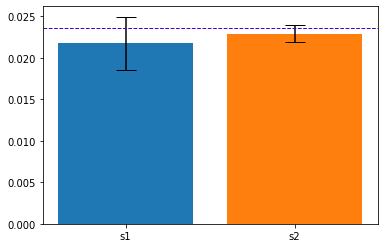

0.0236

In [88]:
import matplotlib.pyplot as plt

#오차막대 표시 yerr=yerr
plt.bar('s1',s1_ozone_mean,align='center', ecolor='black',yerr=CI1_err,capsize=10)
plt.bar('s2',s2_ozone_mean,align='center', ecolor='black',yerr=CI2_err,capsize=10)
pop_mean=np.mean(df['오존(ppm)'])
plt.axhline(y=pop_mean, color='#4000c7',linestyle='--' ,linewidth=1)
plt.show()

# 🔥 도전과제
> 아래 두 문제를 모두 다 하시면 됩니다.

## 1. [plotly](https://plotly.com/) 나 [seaborn](http://seaborn.pydata.org/index.html), [bokeh](https://docs.bokeh.org/en/latest/index.html) 등 다른 시각화 라이브러리를 선택하여 앞에서 그렸던 신뢰구간을 해당 라이브러리를 선택하여 그려보세요.

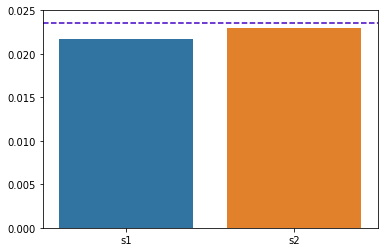

In [65]:
import seaborn as sns 

df2 = pd.DataFrame({'s1':[s1_ozone_mean],'s2':[s2_ozone_mean]})
ax = sns.barplot(data=df2)
ax.axhline(np.mean(df['오존(ppm)']),ls='--',color='#4000c7')
plt.ylim(0.000,0.025)
plt.show()

## 2. 위 데이터의 `초미세먼지` 데이터를 사용하여, 큰 수의 법칙과, 중심극한가설을 표현하는 코드를 작성하세요.

In [145]:
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/서울시_기간별_시간평균_대기환경_정보_2020.03.csv',encoding='cp949')
df1 = df1[df1['측정소명']=='송파구'].loc[:,['초미세먼지(㎍/㎥)']]

#큰 수의 법칙
population = np.array(df1['초미세먼지(㎍/㎥)'])
print(population.var(),np.random.choice(population, 5).var(),np.random.choice(population, 10).var(),np.random.choice(population, 200).var())

157.92206468955948 234.4 178.45 132.15240000000003


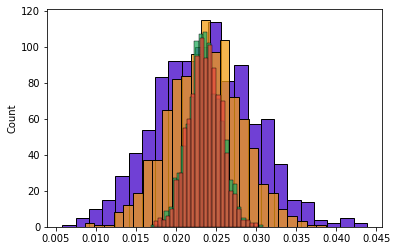

In [176]:
import seaborn as sns
ax = plt.subplots()

def CLT(population,num_size,colors):
  sample_mean = []
  for _ in range(0,1000):
    sample_mean.append(np.random.choice(population,num_size).mean())
  sns.histplot(sample_mean, color = colors)

CLT(df['오존(ppm)'],5,'#4000c7')
CLT(df['오존(ppm)'],10,'#f39c12')
CLT(df['오존(ppm)'],50,'#27ae60')
CLT(df['오존(ppm)'],50,'#e74c3c')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
